# cygnus-actiondist
10/10/2023

Compare the action distributions of Cygnus and Pythia, to understand overfitting and width prefetching
- *Reference*: Multi-Armed Bandits paper

In [1]:
from collections import defaultdict
from importlib import reload
import os
import sys
import toml
from typing import List, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

sys.path.append('../../')
from naboo_utils.util import naboo_open
from naboo_utils import file, table
from plot_utils import collate, plot

## Results

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
reload(table)
reload(file)
studies = {
    "prefetchers_actionstudy": collate.StudyCollator(sim_dir, "prefetchers_actionstudy", 
                                                     baseline_study=baseline_study, 
                                                     baseline_experiment=baseline_experiment,
                                                     weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files:  40%|███▉      | 133/335 [00:02<00:01, 124.15file/s]

[ipykernel_launcher][angrist-3] Skipping /u/cmolder/GitHub/ChampSim/sim/dram_dramsim3/default_3200/prefetchers_actionstudy/cygnus_pythialike_bandit__deg1/omnetpp/omnetpp_4B because it failed


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 335/335 [00:03<00:00, 90.57file/s] 

[ipykernel_launcher][angrist-3] Generating benchmark stats for 24 benchmarks over 5 experiments:
    Benchmarks : 649.fotonik3d soplex astar 627.cam4 619.lbm lbm 607.cactuBSSN 628.pop2 omnetpp xalancbmk milc zeusmp bwaves 605.mcf gcc mcf GemsFDTD 623.xalancbmk sphinx3 cactusADM leslie3d 602.gcc libquantum 620.omnetpp
    Experiments: cygnus_pythialike__deg1 pythia__deg1 cygnus_pythialike_bandit__deg1 cygnus_pythialike_shadowprefetch__deg1 cygnus_depth__deg1
        



[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 120/120 [00:02<00:00, 49.43it/s] 


[ipykernel_launcher][angrist-3] Generating suite stats for 3 suites over 5 experiments:
    Suites     : all spec17 spec06
    Experiments: cygnus_pythialike__deg1 pythia__deg1 cygnus_pythialike_bandit__deg1 cygnus_pythialike_shadowprefetch__deg1 cygnus_depth__deg1
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 15/15 [00:01<00:00,  8.29it/s]


### IPC improvement

In [4]:
action_study_df = {
    "Pythia (Sarsa + original)": studies["prefetchers_actionstudy"]["pythia__deg1"],
    "Pythia (Sarsa)": studies["prefetchers_actionstudy"]["cygnus_pythialike__deg1"],
    "Pythia (CB)": studies["prefetchers_actionstudy"]["cygnus_pythialike_bandit__deg1"],
    "Pythia (CB + Shadow Prefetch)": studies["prefetchers_actionstudy"]["cygnus_pythialike_shadowprefetch__deg1"],
    "Cygnus": studies["prefetchers_actionstudy"]["cygnus_depth__deg1"],
}

In [5]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec06", "cpu.gmean.ipc_improvement").T

,Pythia (Sarsa + original),Pythia (Sarsa),Pythia (CB),Pythia (CB + Shadow Prefetch),Cygnus
GemsFDTD,39.460000,39.460000,43.27,38.94000,47.32000
astar,6.680000,6.680000,6.98,7.31000,7.42000
bwaves,29.240000,29.240000,30.71,23.86000,34.43000
cactusADM,74.740000,74.740000,74.71,61.22000,69.82000
gcc,9.740000,9.740000,9.75,9.62000,11.59000
lbm,25.660000,25.660000,25.62,24.14000,25.41000
leslie3d,15.130000,15.130000,15.12,16.77000,21.51000
libquantum,26.670000,26.670000,27.10,42.13000,49.96000
mcf,15.360000,15.360000,16.52,10.53000,10.70000
milc,7.120000,7.120000,7.06,10.40000,9.99000


In [6]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec17", "cpu.gmean.ipc_improvement").T

,Pythia (Sarsa + original),Pythia (Sarsa),Pythia (CB),Pythia (CB + Shadow Prefetch),Cygnus
602.gcc,57.820000,57.820000,58.110000,52.690000,63.13000
605.mcf,0.480000,0.480000,-0.120000,-0.010000,-0.03000
607.cactuBSSN,33.130000,33.130000,32.300000,25.900000,24.91000
619.lbm,15.550000,15.550000,15.570000,9.860000,21.88000
620.omnetpp,0.460000,0.460000,0.550000,0.890000,0.56000
623.xalancbmk,5.150000,5.150000,8.470000,4.010000,10.88000
627.cam4,8.310000,8.310000,8.330000,8.220000,8.53000
628.pop2,7.170000,7.170000,7.120000,7.290000,9.70000
649.fotonik3d,17.160000,17.160000,32.040000,14.240000,42.70000
gmean,14.950893,14.950893,16.766351,12.726687,18.77095


In [7]:
reload(plot)
plot.get_suite_table(action_study_df, "cpu.gmean.ipc_improvement", suites=suites, add_mean=True).T

,Pythia (Sarsa + original),Pythia (Sarsa),Pythia (CB),Pythia (CB + Shadow Prefetch),Cygnus
spec06,18.810000,18.810000,NaN,19.170000,22.130000
spec17,14.950000,14.950000,16.77,12.730000,18.770000
gmean,16.864064,16.864064,NaN,15.905281,20.438283


## Action analysis

In [8]:
def parse_cygnus_actions(out_path: str()) -> dict:
    action_dist = {}
    action_count = {}
    with naboo_open(out_path) as f:
        in_action_dist_table = False
        in_action_stats_table = False

        done_action_dist_table = False
        done_action_stats_table = False

        for line in f:
            line = line.decode("utf-8")
            # Action distribution table
            if line.startswith("cygnus action distribution"):
                # Start of table
                in_action_dist_table = True
            if in_action_dist_table:
                tokens = line.split("|")
                if len(tokens) == 2 and tokens[0].strip() != "Threshold":
                    threshold, avg_count = float(tokens[0].strip()), float(tokens[1].strip())
                    action_dist[threshold] = avg_count
                if line == "\n":
                    # End of table
                    in_action_dist_table = False
                    done_action_dist_table = True


            # Action count table
            if line.startswith("cygnus action statistics"):
                # Start of table
                in_action_stats_table = True
            if in_action_stats_table:
                tokens = line.split("|")
                #print(tokens)
                if len(tokens) == 7 and tokens[0].strip() != "Action" and tokens[0].strip() != "total":
                    action, count = int(tokens[0].strip()), int(tokens[1].strip())
                    action_count[action] = count
                if line == "\n":
                    # End of table
                    in_action_stats_table = False
                    done_action_stats_table = True
            
            # Stop when both tables have been parsed
            if done_action_dist_table and done_action_stats_table:
                break

    data = {}
    data["score dist"] = action_dist
    data["action dist"] = action_count

    # Action distribution
    if "pythia" in out_path:
        data["score dist"] = {k / 3: v for k, v in data["score dist"].items()}

    # Most frequent action
    total_actions = sum(data["action dist"].values())
    most_freq_action = sorted(data["action dist"], key=data["action dist"].get)[-1]
    second_most_freq_action = sorted(data["action dist"], key=data["action dist"].get)[-2]

    data["most freq action pct"] = data["action dist"][most_freq_action] / total_actions * 100.0
    data["second most freq action pct"] = data["action dist"][second_most_freq_action] / total_actions * 100.0

    return data

def average_stats(stats: List[dict], weights: Optional[List[float]] = None) -> dict:
    """Produce an amean average for each stat."""
    new_stats = {}
    for k, v in stats[0].items():
        if isinstance(v, dict):
            new_stats[k] = average_stats([s[k] for s in stats], weights)
        elif weights is None:
            new_stats[k] = np.average([s[k] for s in stats])
        else:
            new_stats[k] = np.average([s[k] for s in stats], weights=weights)
    return new_stats

In [9]:
def collate_cygnus_actions(study_dir: str, experiment: str, benchmarks: List[str], weights: dict):
    experiment_dir = os.path.join(study_dir, experiment)
    benchmarks_data = {}
    for benchmark in benchmarks:
        benchmark_dir = os.path.join(experiment_dir, benchmark)
        benchmark_phase_data = []
        benchmark_weights = []
        for phase, weight in weights[benchmark].items():
            phase_file = os.path.join(benchmark_dir, f"{phase}.OUT.gz")
            phase_data = parse_cygnus_actions(phase_file)
            benchmark_phase_data.append(phase_data)
            benchmark_weights.append(weight)
        benchmark_data = average_stats(benchmark_phase_data, benchmark_weights)
        benchmarks_data[benchmark] = benchmark_data

    benchmarks_data["average"] = average_stats(list(benchmarks_data.values()))
    return benchmarks_data

In [10]:
# Load experiment action data
benchmarks = sorted(list(studies["prefetchers_actionstudy"].tabler.get_benchmarks()))
benchmarks.remove("omnetpp") # Deadlock
benchmarks.remove("605.mcf") # Deadlock
weights = toml.load(weights_path)

experiments_data = {}
experiments = [
    "cygnus_pythialike__deg1",
    "cygnus_pythialike_bandit__deg1",
    "cygnus_pythialike_shadowprefetch__deg1",
    "cygnus_depth__deg1",
]
for experiment in experiments:
    experiment_data = collate_cygnus_actions(os.path.join(sim_dir, "prefetchers_actionstudy"),
                                             experiment, benchmarks, weights)
    experiments_data[experiment] = experiment_data

## Plotting

### Action score distribution

In [11]:
def plot_score_dist(distributions: dict, title: str = "", ymax: int = 20):
    fig, ax = plt.subplots(figsize=(5, 2.5), dpi=dpi)

    markers = [".", "^", "*"]

    for i, (exp, data) in enumerate(distributions.items()):
        X = np.array(list(data["score dist"].keys()))
        y = np.array(list(data["score dist"].values()))

        ax.plot(X, y, color=str(i / len(distributions)), label=exp, marker=markers[i])

        print(exp)
        print(X[-9])
        print(y[-9])

    ax.set_xlabel("Score")
    ax.set_ylabel("Avg # of actions > score")
    #ax.set_title(title)

    ax.grid(axis="both", alpha=0.5)
    ax.set_xlim(3, 20)
    ax.set_ylim(0, ymax)
    #ax.set_yticks(np.arange(0, 16, 2))
    ax.set_axisbelow(True)
    ax.legend()

    # Initial Q-value (Q_0)
    #ax.axvline(6.71, color='0.66', linestyle='--')
    #ax.annotate("$Q_0$", (6.71 - 1.2, ymax - 1), color='0.66', fontsize=8)

    # Accurate, late Q-value (R_AL)
    #ax.axvline(12.0, color='0.66', linestyle='--')
    #ax.annotate("$R_{AL}$", (12.0 - 1.2, ymax - 1), color='0.66', fontsize=8)

    fig.tight_layout()

ε-greedy
12.0
0.7390755067230367
shadow
12.0
3.103601235338871


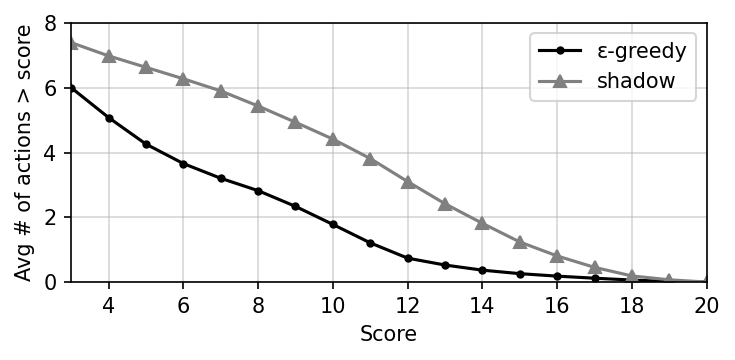

In [13]:
action_score_bk = "average"
score_data = {
    "ε-greedy": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Score distribution", ymax=8)
plt.savefig("cygnus_score_dist.pdf", bbox_inches="tight")
plt.savefig("cygnus_score_dist.png", bbox_inches="tight")

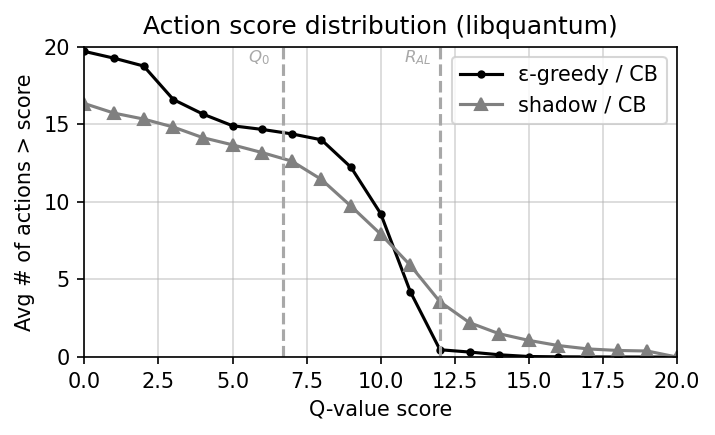

In [33]:
action_score_bk = "libquantum"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

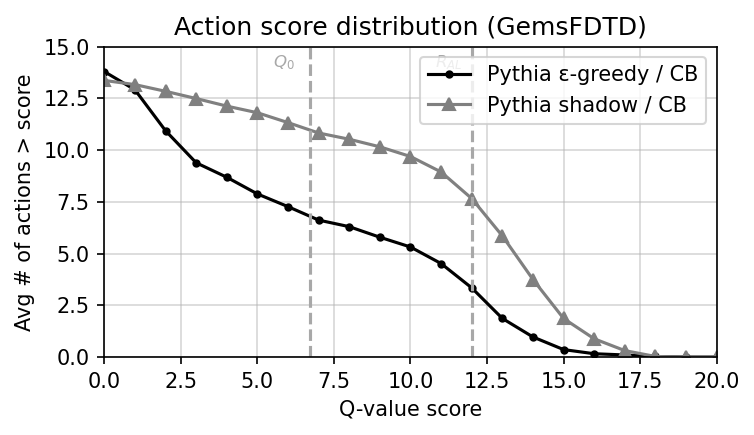

In [34]:
action_score_bk = "GemsFDTD"
score_data = {
    "Pythia ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"Pythia ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "Pythia shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"Cygnus shadow / CB": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=15)

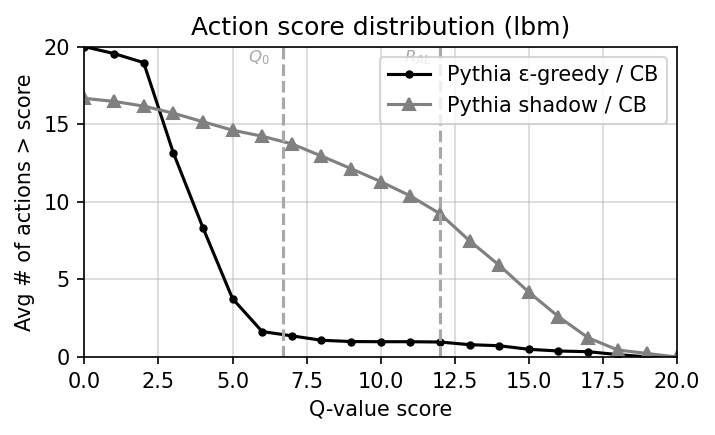

In [37]:
action_score_bk = "lbm"
score_data = {
    "Pythia ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"Pythia ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "Pythia shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"Cygnus shadow / CB": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

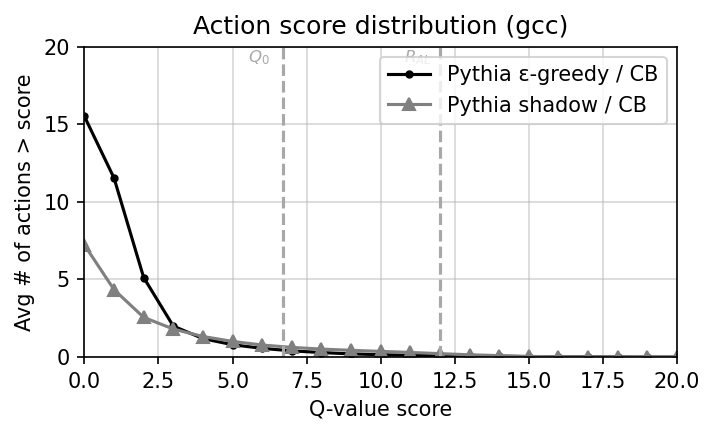

In [38]:
action_score_bk = "gcc"
score_data = {
    "Pythia ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"Pythia ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "Pythia shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"Cygnus shadow / CB": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

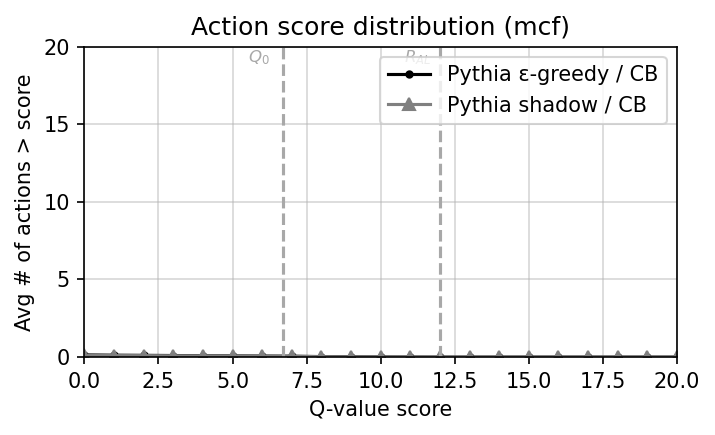

In [39]:
action_score_bk = "mcf"
score_data = {
    "Pythia ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"Pythia ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "Pythia shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"Cygnus shadow / CB": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

In [22]:
def plot_action_freq(experiments_data: dict):
    benchmarks = set()
    for exp, data in experiments_data.items():
        #print(exp)
        #print(data.keys())
        benchmarks |= set(list(data.keys()))

    fig, ax = plt.subplots(figsize=(10, 3), dpi=dpi)
    benchmarks = sorted(list(benchmarks))
    benchmarks.remove("average")
    benchmarks.append("average")
    X = (len(experiments_data) + 1) * np.arange(len(benchmarks))
    for i, (exp, data) in enumerate(experiments_data.items()):
        y_mf = [data[benchmark]["most freq action pct"] for benchmark in benchmarks]
        y_smf = [data[benchmark]["second most freq action pct"] for benchmark in benchmarks]
        ax.bar(X + i, y_mf, 
               label=exp + " (most selected)", 
               width=0.85, linewidth=0.3,
               #color=f"C{i}",
               color=str(i * 1 / len(experiments_data)),
               edgecolor='black')
        ax.bar(X + i, y_smf, bottom=y_mf,
               label=("(second-most selected)" if i == len(experiments_data) - 1 else None), # Put label at end
               width=0.85, linewidth=0.3,
               color="white", edgecolor='black',
               hatch="\\\\\\")

    ax.set_xticks(X + 0.5)
    ax.set_xticklabels(benchmarks, rotation=60, fontsize=8)
    ax.set_xlim(-1.5, 3 * len(benchmarks) - 0.5)
    ax.set_ylabel("Action frequency (%)")
    ax.grid(axis="y", alpha=0.5)
    ax.set_axisbelow(True)

    fig.legend(loc="upper left", ncol=len(experiments_data) + 1, bbox_to_anchor=(0.065, 1.05), fontsize=8)
    fig.tight_layout()


### Action frequency

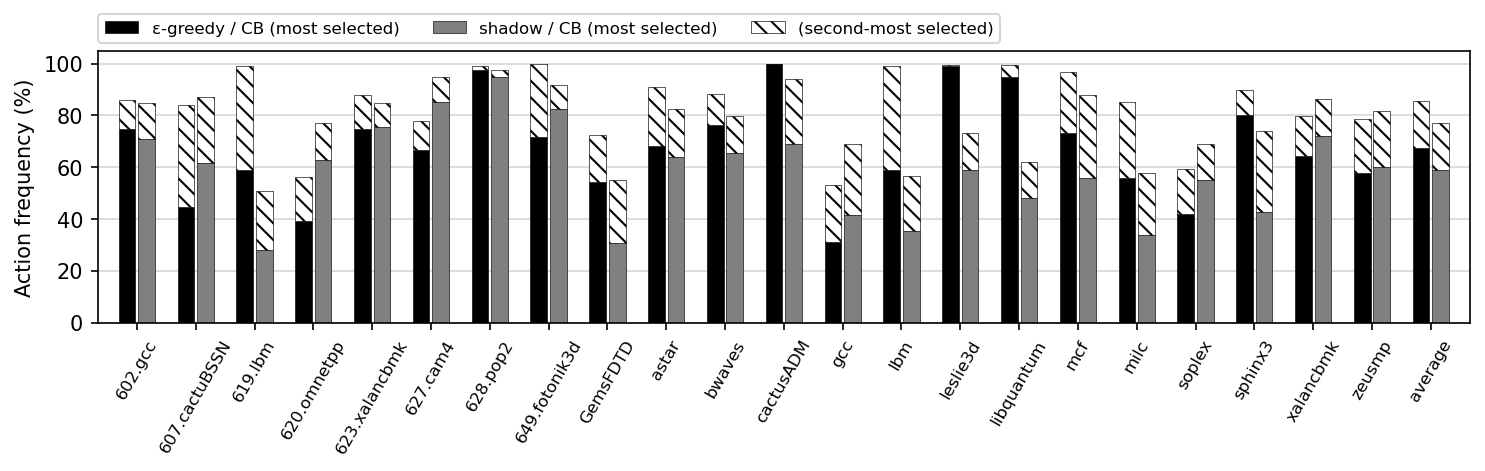

In [35]:
freq_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"],
}

plot_action_freq(freq_data)
plt.savefig("cygnus_action_freq.pdf", bbox_inches="tight")
plt.savefig("cygnus_action_freq.png", bbox_inches="tight")